In [2]:
pip install yfinance matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


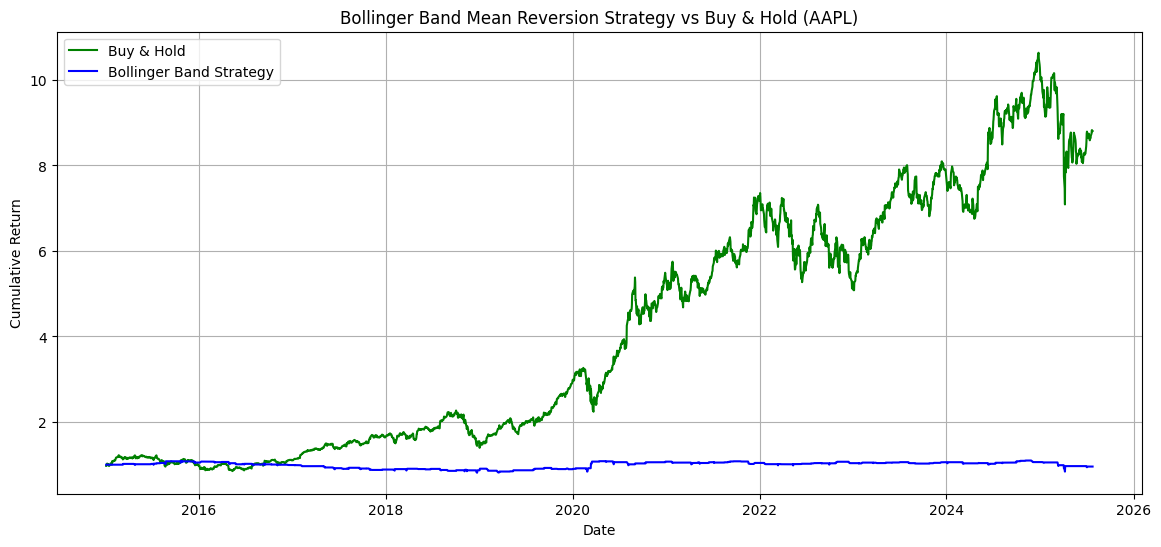

In [17]:
# download data
ticker = 'AAPL'
start_date = '2015-01-01'
raw   = yf.download(ticker, start=start_date)
data  = pd.DataFrame() # data = data[['Close']] doesn't work here

# keep Close as a TRUE Series, then assign back
data['Close'] = raw['Close'] # 1-D series

# bollinger band parameters
window = 20
data['MA20'] = data['Close'].rolling(window=window).mean()
data['STD20'] = data['Close'].rolling(window=window).std()
data['Upper'] = data['MA20'] + 2 * data['STD20']
data['Lower'] = data['MA20'] - 2 * data['STD20']

# buy/sell signals
data['Signal'] = 0
data.loc[data['Close'] < data['Lower'], 'Signal'] = 1   # buy
data.loc[data['Close'] > data['Upper'], 'Signal'] = -1  # sell

# shift signals to next day position
data['Position'] = data['Signal'].shift(1)

# calulate returns
data['Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Return'] * data['Position']

# cumulative returns
data['Strategy_cumreturn'] = (1 + data['Strategy_Return']).cumprod()
data['cumreturn'] = (1 + data['Return']).cumprod()

# plot
plt.figure(figsize=(14,6))
plt.plot(data['cumreturn'], label='Buy & Hold', color='green')
plt.plot(data['Strategy_cumreturn'], label='Bollinger Band Strategy', color='blue')
plt.title('Bollinger Band Mean Reversion Strategy vs Buy & Hold (AAPL)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()



[*********************100%***********************]  1 of 1 completed


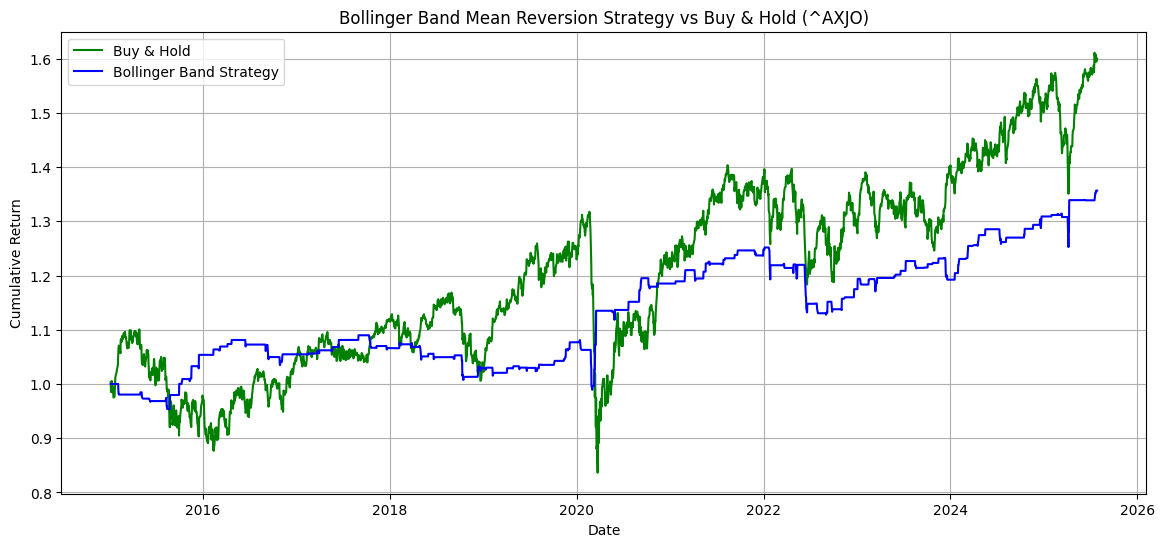

In [19]:
# download data
ticker = '^AXJO'
start_date = '2015-01-01'
raw   = yf.download(ticker, start=start_date)
data  = pd.DataFrame() # data = data[['Close']] doesn't work here

# keep Close as a TRUE Series, then assign back
data['Close'] = raw['Close'] # 1-D series

# bollinger band parameters
window = 20
data['MA20'] = data['Close'].rolling(window=window).mean()
data['STD20'] = data['Close'].rolling(window=window).std()
data['Upper'] = data['MA20'] + 2 * data['STD20']
data['Lower'] = data['MA20'] - 2 * data['STD20']

# buy/sell signals
data['Signal'] = 0
data.loc[data['Close'] < data['Lower'], 'Signal'] = 1   # buy
data.loc[data['Close'] > data['Upper'], 'Signal'] = -1  # sell

# shift signals to next day position
data['Position'] = data['Signal'].shift(1)

# calulate returns
data['Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Return'] * data['Position']

# cumulative returns
data['Strategy_cumreturn'] = (1 + data['Strategy_Return']).cumprod()
data['cumreturn'] = (1 + data['Return']).cumprod()

# plot
plt.figure(figsize=(14,6))
plt.plot(data['cumreturn'], label='Buy & Hold', color='green')
plt.plot(data['Strategy_cumreturn'], label='Bollinger Band Strategy', color='blue')
plt.title('Bollinger Band Mean Reversion Strategy vs Buy & Hold (^AXJO)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

